<a href="https://colab.research.google.com/github/reinanbrNotebooks/Colab_Notebooks/blob/main/grade_termodinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import matplotlib.pyplot as plt

import statistics as sts

In [79]:
def generate_matriz(N):
  limit_i = N
  matriz_base = np.ones((N,2*N))

  j_n = 0
  for j in matriz_base:
    i_n = 0
    for i in j:
      n = 1
      if i_n>=limit_i:
        n = 50
      else:
        n = 100
      matriz_base[j_n][i_n] = n
      i_n = i_n + 1
    j_n = j_n + 1
  return matriz_base

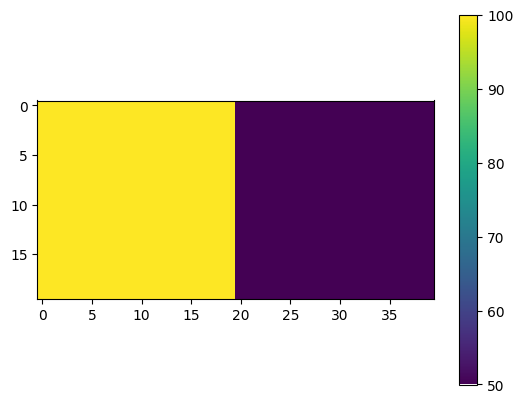

In [92]:
img = generate_matriz(20)

plt.imshow(img)
plt.colorbar()

In [87]:
img

array([[100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,  50.,
         50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,  50.,
         50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,  50.,
         50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,  50.,
         50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,  50.,
         50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,  50.,
         50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,  50.,
         50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.],
       [100., 100., 100., 100., 100., 100

In [83]:
def way_to(img,N):
  len_j = len(img)
  len_i = len(img[0])
  new_img = np.copy(img)
  j_n = 0
  for x in range(N):
    j_n = 0
    for j in range(len_j):
      i_n = 0
      for i in range(len_i):


        if new_img[j_n][i_n-1] > new_img[j_n][i_n]:
            #print(f"img[{j_n}][{i_n-1}]")
            new_img[j_n][i_n-1] = new_img[j_n][i_n-1] - 1 #new_img[j_n][i_n-1]*.5
            new_img[j_n][i_n] = new_img[j_n][i_n] + 1 # new_img[j_n][i_n-1]*.5


        i_n += 1
      i_n = 0
      for i in range(len_i):

        if new_img[j_n][i_n-1] < new_img[j_n][i_n]:
            #print(f"img[{j_n}][{i_n-1}]")
            new_img[j_n][i_n-1] = new_img[j_n][i_n-1] + 1 #new_img[j_n][i_n]*.5
            new_img[j_n][i_n] = new_img[j_n][i_n] - 1 #new_img[j_n][i_n]*.5
        i_n += 1

      j_n += 1
  return new_img




In [109]:
def generate_entropy_to_zero(img):

  N = 1
  new_img = way_to(img,N)
  std = stdev_matrix(new_img)
  mod = mode_matrix(new_img)
  s = entropy(new_img)

  new_img_list = [new_img]
  std_list = [std]
  mod_list = [mod]
  s_list = [s]
  N_list = [N]

  while(s>.5):
    new_img = way_to(img,N)
    new_img_list.append(new_img)

    std = stdev_matrix(new_img)
    std_list.append(std)

    mod = mode_matrix(new_img)
    mod_list.append(mod)

    s = entropy(new_img)
    s_list.append(s)

    N += 1
    N_list.append(N)

    print(f"N = {N} -> [s={s} | mod={mod} | std={std}]")

  #return new_img_list,s_list,mod_list,std_list,N_list

generate_entropy_to_zero(img)

N = 2 -> [s=1.4689955935892813 | mod=100.0 | std=24.91738539893178]
N = 3 -> [s=1.7219280948873623 | mod=100.0 | std=24.818742160977184]
N = 4 -> [s=1.8812908992306925 | mod=100.0 | std=24.719705293292517]
N = 5 -> [s=1.9709505944546686 | mod=100.0 | std=24.620270045663627]
N = 6 -> [s=2.0 | mod=100.0 | std=24.520431571560266]
N = 7 -> [s=1.9709505944546688 | mod=99.0 | std=24.4201849253796]
N = 8 -> [s=1.8812908992306925 | mod=99.0 | std=24.31952505958751]
N = 9 -> [s=1.721928094887362 | mod=99.0 | std=24.218446821752888]
N = 10 -> [s=1.4689955935892813 | mod=99.0 | std=24.116944951470124]
N = 11 -> [s=1.0 | mod=99.0 | std=24.015014077164476]
N = 12 -> [s=1.4689955935892813 | mod=99.0 | std=23.916835467374586]
N = 13 -> [s=1.7219280948873623 | mod=99.0 | std=23.818252169723237]
N = 14 -> [s=1.8812908992306925 | mod=99.0 | std=23.719259138252706]
N = 15 -> [s=1.9709505944546686 | mod=99.0 | std=23.619851221263932]
N = 16 -> [s=2.0 | mod=99.0 | std=23.52002315818805]
N = 17 -> [s=1.9709

In [ ]:

N = 300
n = range(1,N+1)
entr = [entropy(way_to(img,i)) for i in n]
std = [stdev_matrix(way_to(img,i)) for i in n]
mod = [ mode_matrix(way_to(img,i)) for i in n]
new_img = way_to(img,N)

# ploting
plt.figure(figsize=(16, 9))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,3,4)
ax3 = plt.subplot(2,3,5)
ax4 = plt.subplot(2,3,6)


cax = ax1.imshow(new_img)
plt.colorbar(cax)
ax2.plot(n,entr)
ax3.plot(n,std)
ax4.plot(n,mod)
#new_img


In [85]:
print(sum(img[0]))
print(sum(new_img[10]))

3000.0
3000.0


In [108]:
from collections import Counter

def count_matrix(img):
  base_matriz = []
  for j in img:
    for i in j:
      base_matriz.append(i)
  return Counter(base_matriz),len(base_matriz)

def freq_count(img):
  count, size = count_matrix(img)
  res = {}
  for key in count.keys():
    #print(key,count[key])
    res[key] = count[key]/size
  return res


def stdev_matrix(img):
  res = []
  for j in img:
    for i in j:
      res.append(i)
  return sts.stdev(res)


def mode_matrix(img):
  res = []
  for j in img:
    for i in j:
      res.append(i)
  return sts.mode(res)

def entropy(img):
  freq = freq_count(img)
  res = 0
  for f in freq.values():
    #print(f)
    res += - f * np.log2(f)
  return res


In [106]:
entropy(new_img)

1.0


0.0